# Importar librerias

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importar librerias

In [2]:
dt_heart = pd.read_csv("../data/heart.csv")

dt_heart["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

# Features

In [4]:
X = dt_heart.drop(["target"], axis=1)
y = dt_heart["target"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.35, random_state=42)

# Clasificador

In [10]:
knn_class = KNeighborsClassifier().fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)
print("="*30)
print(accuracy_score(knn_pred, y_test))

# Clasificador por ensamble
bag_class = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50).fit(X_train, y_train)

bag_pred = bag_class.predict(X_test)
print("="*30)
print(accuracy_score(bag_pred, y_test))

0.6908077994428969
0.7298050139275766


In [16]:

import warnings
warnings.filterwarnings("ignore")

In [29]:
estimators = {
    'LogisticRegression' : LogisticRegression(),
    'SVC' : SVC(),
    'LinearSVC' : LinearSVC(),
    'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
    'KNN' : KNeighborsClassifier(),
    'DecisionTreeClf' : DecisionTreeClassifier(),
    'RandomTreeForest' : RandomForestClassifier(random_state=0)
}
data_acuraccy = {
    "scores": [],
    "names":[]
}
for name, estimator in estimators.items():
    bag_class = BaggingClassifier(estimator=estimator, n_estimators=50).fit(X_train, y_train)
    bag_predict = bag_class.predict(X_test)
    print('='*64)
    print('SCORE Bagging with %s  %.5f'%(name, accuracy_score(bag_predict, y_test)))
    data_acuraccy["scores"].append(accuracy_score(bag_predict, y_test))
    data_acuraccy["names"].append(name)
    #print(f'Cross val score with {name} : {round(scores.mean(), 2)} accuracy with a standard deviation of {round(scores.std(), 2)}')




SCORE Bagging with LogisticRegression  0.81337
SCORE Bagging with SVC  0.67967
SCORE Bagging with LinearSVC  0.82173
SCORE Bagging with SGD  0.65738
SCORE Bagging with KNN  0.73259
SCORE Bagging with DecisionTreeClf  0.98329
SCORE Bagging with RandomTreeForest  0.98329


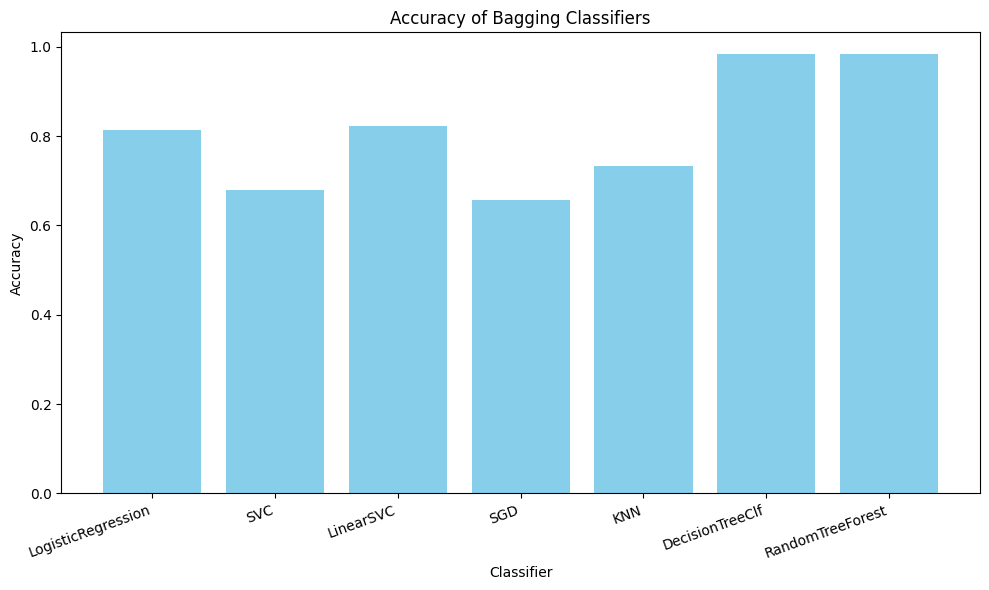

In [38]:

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(data_acuraccy['names'], data_acuraccy['scores'], color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Bagging Classifiers')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

plt.show()

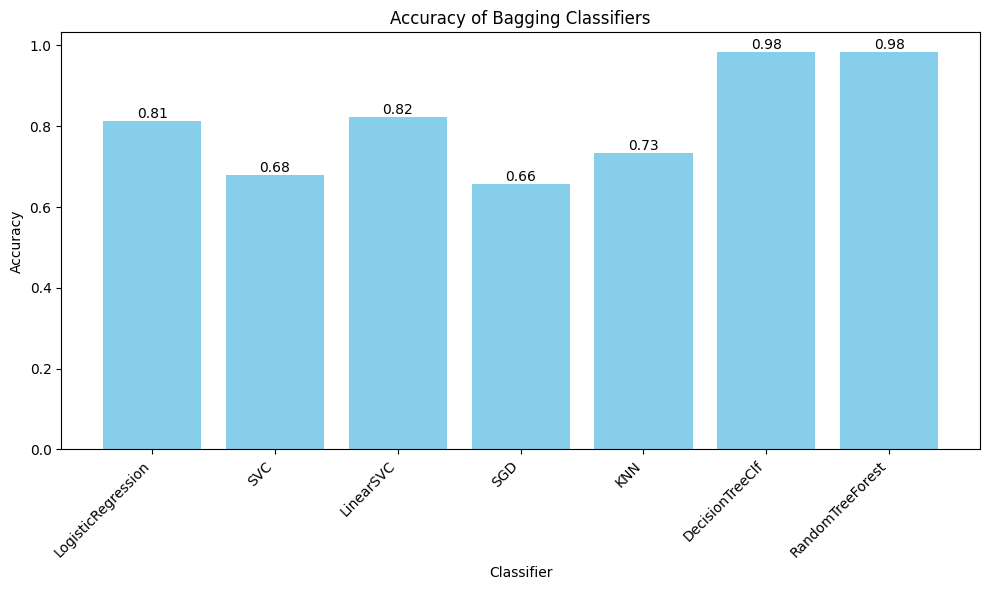

In [42]:
# Datos de ejemplo (suponiendo que data_accuracy contiene los datos)
scores = data_acuraccy['scores']
names = data_acuraccy['names']

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(names, scores, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Bagging Classifiers')

# Rotar etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar los números en las barras
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Gradiend buster (Boosting)

In [46]:
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train,y_train)

boost_pred = boost.predict(X_test)
print("="*30)
print(accuracy_score(boost_pred,y_test))

0.935933147632312
